In [1]:
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds

# IMDB Dataset

In [5]:
train_data = tfds.as_numpy(tfds.load('imdb_reviews', split='train'))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete5R2OH6/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete5R2OH6/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete5R2OH6/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [6]:
train_data

In [56]:
imdb_sentences = []
imdb_labels = []

for item in train_data:
  imdb_sentences.append(str(item['text']))
  imdb_labels.append(item['label'])

In [9]:
len(imdb_sentences)

25000

In [ ]:
imdb_labels

In [57]:
imdb_sentences[25]

'b"Well, i rented this movie and found out it realllllllly sucks. It is about that family with the stepmother and the same stupid fights in the family,then the cool son comes with his stupid camera and he likes to take a photo to damaged building and weird things and weird movie ,and then he asks his father to take him to a side trip and simply agrees, etc etc etc..... They go to that town which no one know it exists (blah blah blah) And the most annoying thing is that the movie ends and yet you don\'t understand what is THAT MOVIE!!!!I have seen many mystery movies but that was the worst, Honestly it doesn\'t have a description at all and i wish i didn\'t see it."'

In [12]:
imdb_labels[25]

0

In [59]:
training_sentences = imdb_sentences[:20000]
test_sentences = imdb_sentences[20000:]

training_labels = imdb_labels[:20000]
test_labels = imdb_labels[20000:]

In [60]:
len(training_sentences), len(test_sentences)

(20000, 5000)

# Tokenisation (Phrases --> Liste de Mots

In [15]:
phrase = "Je suis au marché"

In [16]:
phrase.split(" ")

['Je', 'suis', 'au', 'marché']

In [17]:
phrases = ["Je suis au marché", "Je travaille au marché"]

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [19]:
tokenizer = Tokenizer()

In [20]:
tokenizer.fit_on_texts(phrases)

In [21]:
tokenizer.word_index

{'je': 1, 'au': 2, 'marché': 3, 'suis': 4, 'travaille': 5}

In [22]:
tokenizer.index_word

{1: 'je', 2: 'au', 3: 'marché', 4: 'suis', 5: 'travaille'}

In [23]:
tokenizer.texts_to_sequences(phrases)

[[1, 4, 2, 3], [1, 5, 2, 3]]

In [24]:
test = ['Je vends au Marché']

In [25]:
tokenizer.texts_to_sequences(test) # je au marché

[[1, 2, 3]]

In [26]:
test = ['Hello, viens']

In [27]:
tokenizer.texts_to_sequences(test)

[[]]

In [28]:
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")
tokenizer.fit_on_texts(phrases)

In [29]:
tokenizer.word_index

{'<OOV>': 1, 'je': 2, 'au': 3, 'marché': 4, 'suis': 5, 'travaille': 6}

In [30]:
test = ['Je vends au Marché']
tokenizer.texts_to_sequences(test)

[[2, 1, 3, 4]]

# Padding

In [31]:
phrases = ["Je suis au marché",
           "Je travaille au marché",
           "es-tu rentré du marché?",
           "Je nettoie le marché tous les jours avant de commencer à vendre le matin"]


tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(phrases)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(phrases)

In [32]:
sequences

[[3, 6, 4, 2],
 [3, 7, 4, 2],
 [8, 9, 10, 11, 2],
 [3, 12, 5, 2, 13, 14, 15, 16, 17, 18, 19, 20, 5, 21]]

In [33]:
word_index

{'<OOV>': 1,
 'marché': 2,
 'je': 3,
 'au': 4,
 'le': 5,
 'suis': 6,
 'travaille': 7,
 'es': 8,
 'tu': 9,
 'rentré': 10,
 'du': 11,
 'nettoie': 12,
 'tous': 13,
 'les': 14,
 'jours': 15,
 'avant': 16,
 'de': 17,
 'commencer': 18,
 'à': 19,
 'vendre': 20,
 'matin': 21}

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
sequences

[[3, 6, 4, 2],
 [3, 7, 4, 2],
 [8, 9, 10, 11, 2],
 [3, 12, 5, 2, 13, 14, 15, 16, 17, 18, 19, 20, 5, 21]]

In [36]:
pad_sequences(sequences)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  6,  4,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  7,  4,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  9, 10, 11,  2],
       [ 3, 12,  5,  2, 13, 14, 15, 16, 17, 18, 19, 20,  5, 21]],
      dtype=int32)

In [37]:
pad_sequences(sequences, padding="post")

array([[ 3,  6,  4,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  7,  4,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 8,  9, 10, 11,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3, 12,  5,  2, 13, 14, 15, 16, 17, 18, 19, 20,  5, 21]],
      dtype=int32)

In [38]:
pad_sequences(sequences, padding="post", maxlen=7)

array([[ 3,  6,  4,  2,  0,  0,  0],
       [ 3,  7,  4,  2,  0,  0,  0],
       [ 8,  9, 10, 11,  2,  0,  0],
       [16, 17, 18, 19, 20,  5, 21]], dtype=int32)

In [39]:
pad_sequences(sequences, padding="post", maxlen=7, truncating="post")

array([[ 3,  6,  4,  2,  0,  0,  0],
       [ 3,  7,  4,  2,  0,  0,  0],
       [ 8,  9, 10, 11,  2,  0,  0],
       [ 3, 12,  5,  2, 13, 14, 15]], dtype=int32)

# Stop words

In [40]:
phrase = "Je vais au marché le Jeudi"

In [41]:
stopwords = ['au', "le"]

In [42]:
words = phrase.split(' ')
phrase_nettoyee = []

for word in words:
  if word not in stopwords:
    phrase_nettoyee.append(word)

In [43]:
phrase_nettoyee

['Je', 'vais', 'marché', 'Jeudi']

In [44]:
" ".join(phrase_nettoyee)

'Je vais marché Jeudi'

# Approche de calcul du Sentiment

In [45]:
phrase = "Votre connexion est lente"

In [ ]:
{5 : 0}

In [ ]:
phrase = "Votre connexion est agréablement lente"

In [ ]:
{"Votre": [1, 0, 5],
 "connexion": [0, 1, 9],
 "est": [3, 2, 3],
 "agréablement": [2, 3, 12],
 "lente": [5, 4, 5]}

# Embedding (plongement)

In [46]:
training_sentences[42]

b'One of the weaker Carry On adventures sees Sid James as the head of a crime gang stealing contraceptive pills. The fourth of the series to be hospital-based, it\'s possibly the least of the genre. There\'s a curiously flat feel throughout, with all seemingly squandered on below-par material. This is far from the late-70s nadir, but Williams, James, Bresslaw, Maynard et al. are all class performers yet not given the backing of a script equal to their ability.<br /><br />Most of the gags are onrunning, rather than episodic as Carry Ons usually are. So that instead of the traditional hit and miss ratio, if you don\'t find the joke funny in the first place you\'re stuck with it for most of the film. These continuous plot strands include Williams \xc2\x96 for no good reason \xc2\x96 worrying that he\'s changing sex, and Kenneth Cope in drag. Like the stagy physical pratt falls, the whole thing feels more contrived than in other movies, and lacking in cast interest. Continuing this theme, 

In [47]:
training_labels[42]

0

In [ ]:
vocab_size, embedding_dim (78371)

In [63]:
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post", maxlen=15, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post", maxlen=15, truncating="post")


In [64]:
training_padded[42]

array([4668,    5,    2, 5838, 1706,   22, 2438, 1117, 5099,  594,   15,
          2,  423,    5,    4], dtype=int32)

In [65]:
import numpy as np

training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

In [66]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(20000, 20),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 20)          400000    
                                                                 
 global_average_pooling1d (G  (None, 20)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 8)                 168       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 400,177
Trainable params: 400,177
Non-trainable params: 0
_________________________________________________________________


In [68]:
20*8 + 8

168

In [69]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [70]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)

In [73]:
h = model.fit(training_padded, training_labels, epochs=50,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 5s 7ms/step - loss: 0.4079 - accuracy: 0.8188 - val_loss: 0.6173 - val_accuracy: 0.6998
Epoch 2/50
625/625 [==============================] - 3s 5ms/step - loss: 0.3631 - accuracy: 0.8425 - val_loss: 0.6538 - val_accuracy: 0.6940
Epoch 3/50
625/625 [==============================] - 3s 6ms/step - loss: 0.3312 - accuracy: 0.8601 - val_loss: 0.6983 - val_accuracy: 0.6892
Epoch 4/50
625/625 [==============================] - 4s 7ms/step - loss: 0.3068 - accuracy: 0.8701 - val_loss: 0.7375 - val_accuracy: 0.6868
Epoch 5/50
625/625 [==============================] - 3s 5ms/step - loss: 0.2865 - accuracy: 0.8785 - val_loss: 0.7969 - val_accuracy: 0.6816
Epoch 6/50
625/625 [==============================] - 3s 5ms/step - loss: 0.2702 - accuracy: 0.8858 - val_loss: 0.8333 - val_accuracy: 0.6792
Epoch 7/50
625/625 [==============================] - 3s 5ms/step - loss: 0.2563 - accuracy: 0.8929 - val_loss: 0.8829 - val_accuracy: 0.6758
Epoch 

In [74]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

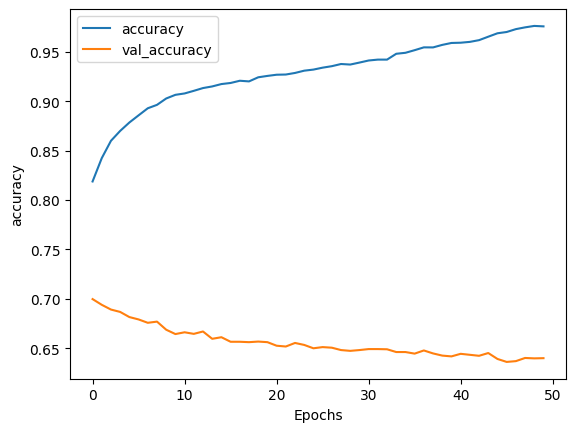

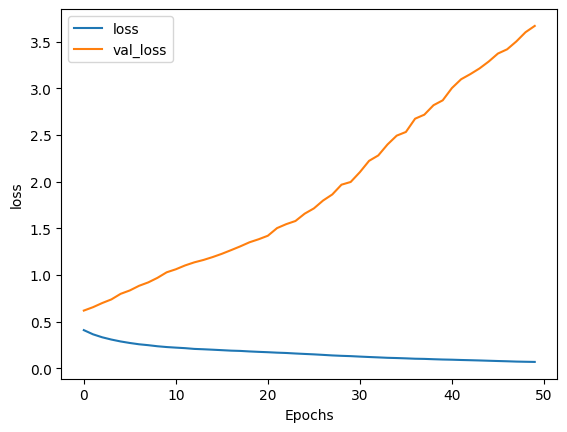

In [75]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

# Vocab size

In [ ]:
# 20000

vocab_size = 1

vocab_size = 78371

In [76]:
len(word_index)

78371

In [77]:
(78371* 20)

1567420

In [79]:
wc = tokenizer.word_counts

In [81]:
wc = sorted(wc.items(), key=lambda t:t[1], reverse=True)

In [86]:
import pandas as pd


In [88]:
df = pd.DataFrame(wc, columns=['mots', "frequence"])

In [104]:
df[df['frequence'] > 10]

,mots,frequence
0,the,268774
1,and,131448
2,a,130000
3,of,116684
4,to,108554
...,...,...
17156,crockett,11
17157,liliom,11
17158,nikhil,11
17159,hanka,11


In [92]:
test_tok = Tokenizer()
test_tok.fit_on_texts(test_sentences)

In [ ]:
test_tok.word_index

In [94]:
test_words = test_tok.word_index.keys()

In [ ]:
test_words

In [96]:
train_words = df['mots'].tolist()

In [97]:
len(train_words), len(test_words)

(78370, 42047)

In [98]:
inter = set(train_words).intersection(test_words)

In [100]:
len(inter)

33879

In [102]:
vocab_size = 29000

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post", maxlen=15, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post", maxlen=15, truncating="post")

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, 20),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)
h = model.fit(training_padded, training_labels, epochs=50,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 5s 7ms/step - loss: 0.6474 - accuracy: 0.6276 - val_loss: 0.5961 - val_accuracy: 0.6860
Epoch 2/50
625/625 [==============================] - 5s 8ms/step - loss: 0.5050 - accuracy: 0.7635 - val_loss: 0.5890 - val_accuracy: 0.6962
Epoch 3/50
625/625 [==============================] - 7s 11ms/step - loss: 0.4145 - accuracy: 0.8197 - val_loss: 0.6196 - val_accuracy: 0.6922
Epoch 4/50
625/625 [==============================] - 4s 7ms/step - loss: 0.3563 - accuracy: 0.8508 - val_loss: 0.6621 - val_accuracy: 0.6890
Epoch 5/50
625/625 [==============================] - 5s 9ms/step - loss: 0.3154 - accuracy: 0.8722 - val_loss: 0.7156 - val_accuracy: 0.6858
Epoch 6/50
625/625 [==============================] - 4s 7ms/step - loss: 0.2858 - accuracy: 0.8870 - val_loss: 0.7717 - val_accuracy: 0.6832
Epoch 7/50
625/625 [==============================] - 6s 9ms/step - loss: 0.2620 - accuracy: 0.8961 - val_loss: 0.8304 - val_accuracy: 0.6778
Epoch

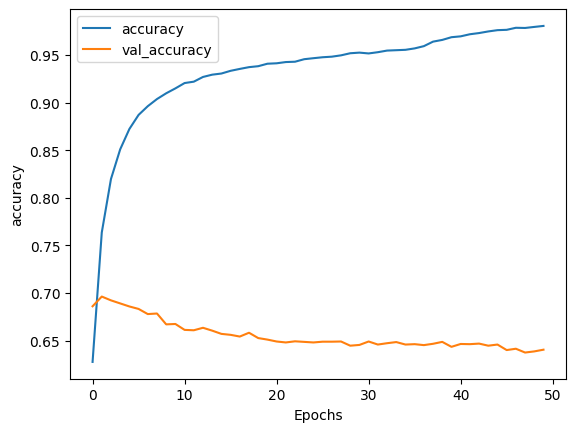

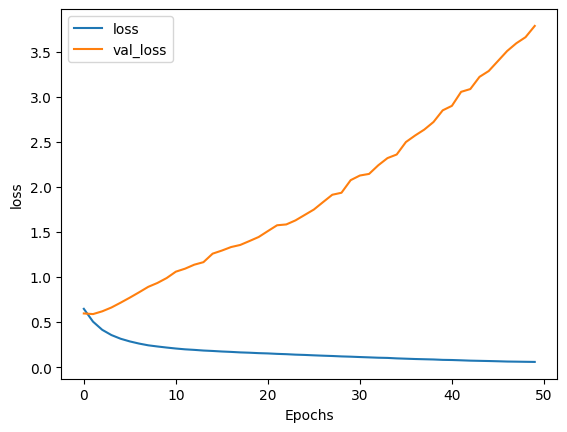

In [103]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

# Embedding dim

In [105]:
np.power(vocab_size, 1/4)

13.049669101523763

In [106]:
vocab_size = 29000
embedding_dim=13

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post", maxlen=15, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post", maxlen=15, truncating="post")

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)
h = model.fit(training_padded, training_labels, epochs=50,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 5s 6ms/step - loss: 0.6472 - accuracy: 0.6338 - val_loss: 0.5946 - val_accuracy: 0.6784
Epoch 2/50
625/625 [==============================] - 5s 8ms/step - loss: 0.5053 - accuracy: 0.7617 - val_loss: 0.5805 - val_accuracy: 0.6948
Epoch 3/50
625/625 [==============================] - 3s 5ms/step - loss: 0.4167 - accuracy: 0.8101 - val_loss: 0.6101 - val_accuracy: 0.6956
Epoch 4/50
625/625 [==============================] - 3s 5ms/step - loss: 0.3597 - accuracy: 0.8452 - val_loss: 0.6550 - val_accuracy: 0.6888
Epoch 5/50
625/625 [==============================] - 4s 6ms/step - loss: 0.3189 - accuracy: 0.8641 - val_loss: 0.7034 - val_accuracy: 0.6858
Epoch 6/50
625/625 [==============================] - 3s 5ms/step - loss: 0.2881 - accuracy: 0.8810 - val_loss: 0.7477 - val_accuracy: 0.6852
Epoch 7/50
625/625 [==============================] - 3s 5ms/step - loss: 0.2643 - accuracy: 0.8917 - val_loss: 0.8060 - val_accuracy: 0.6794
Epoch 

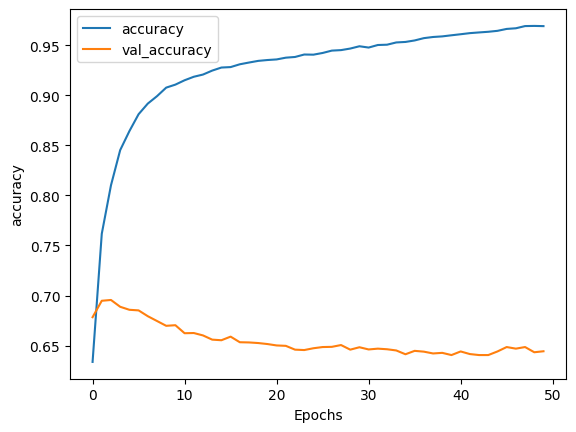

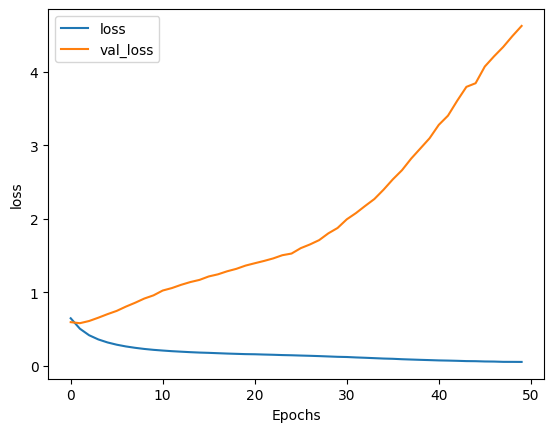

In [107]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

# Architecture du model

In [108]:
vocab_size = 29000
embedding_dim=13

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post", maxlen=15, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post", maxlen=15, truncating="post")

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)
h = model.fit(training_padded, training_labels, epochs=50,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 6s 8ms/step - loss: 0.6588 - accuracy: 0.6163 - val_loss: 0.6055 - val_accuracy: 0.6870
Epoch 2/50
625/625 [==============================] - 4s 7ms/step - loss: 0.5097 - accuracy: 0.7600 - val_loss: 0.5809 - val_accuracy: 0.7040
Epoch 3/50
625/625 [==============================] - 3s 5ms/step - loss: 0.4121 - accuracy: 0.8167 - val_loss: 0.6164 - val_accuracy: 0.6956
Epoch 4/50
625/625 [==============================] - 3s 5ms/step - loss: 0.3524 - accuracy: 0.8521 - val_loss: 0.6583 - val_accuracy: 0.6884
Epoch 5/50
625/625 [==============================] - 3s 5ms/step - loss: 0.3115 - accuracy: 0.8728 - val_loss: 0.7228 - val_accuracy: 0.6860
Epoch 6/50
625/625 [==============================] - 4s 7ms/step - loss: 0.2822 - accuracy: 0.8847 - val_loss: 0.7621 - val_accuracy: 0.6882
Epoch 7/50
625/625 [==============================] - 3s 5ms/step - loss: 0.2589 - accuracy: 0.8974 - val_loss: 0.8145 - val_accuracy: 0.6782
Epoch 

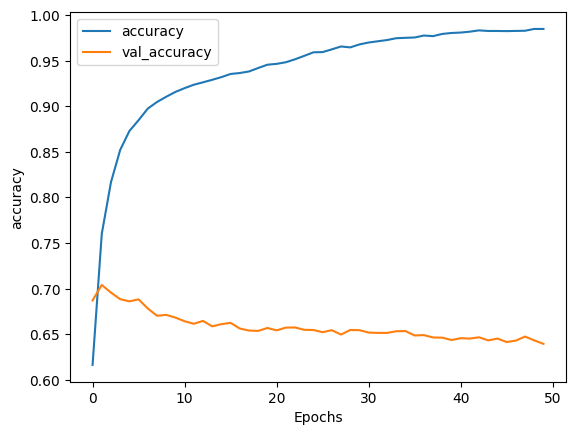

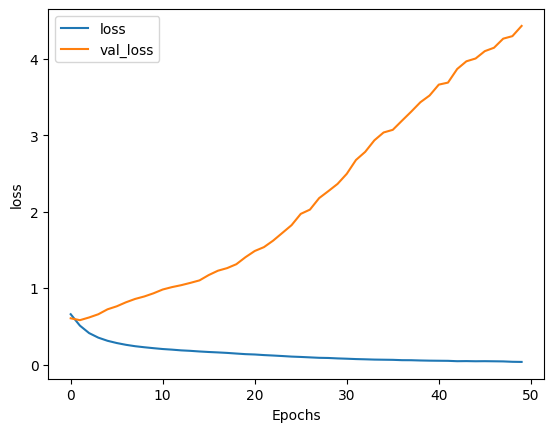

In [109]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

# Max len + Dropout

In [110]:
tailles = []

for sent in training_sentences:
  tailles.append(len(sent.split(" ")))

In [112]:
np.array(tailles).min(), np.array(tailles).max(), np.array(tailles).mean()

(10, 2470, 233.90165)

In [113]:
np.median(tailles)

174.0

In [116]:
vocab_size = 29000
embedding_dim=13
maxlen = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post", maxlen=maxlen, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post", maxlen=maxlen, truncating="post")

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)
h = model.fit(training_padded, training_labels, epochs=50,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 6s 8ms/step - loss: 0.6433 - accuracy: 0.6319 - val_loss: 0.5361 - val_accuracy: 0.7990
Epoch 2/50
625/625 [==============================] - 7s 11ms/step - loss: 0.4545 - accuracy: 0.8464 - val_loss: 0.4413 - val_accuracy: 0.8352
Epoch 3/50
625/625 [==============================] - 3s 6ms/step - loss: 0.3365 - accuracy: 0.8956 - val_loss: 0.4140 - val_accuracy: 0.8376
Epoch 4/50
625/625 [==============================] - 3s 6ms/step - loss: 0.2566 - accuracy: 0.9247 - val_loss: 0.4322 - val_accuracy: 0.8352
Epoch 5/50
625/625 [==============================] - 5s 8ms/step - loss: 0.1999 - accuracy: 0.9448 - val_loss: 0.4843 - val_accuracy: 0.8320
Epoch 6/50
625/625 [==============================] - 4s 6ms/step - loss: 0.1588 - accuracy: 0.9589 - val_loss: 0.5848 - val_accuracy: 0.8302
Epoch 7/50
625/625 [==============================] - 4s 6ms/step - loss: 0.1271 - accuracy: 0.9696 - val_loss: 0.7495 - val_accuracy: 0.8252
Epoch

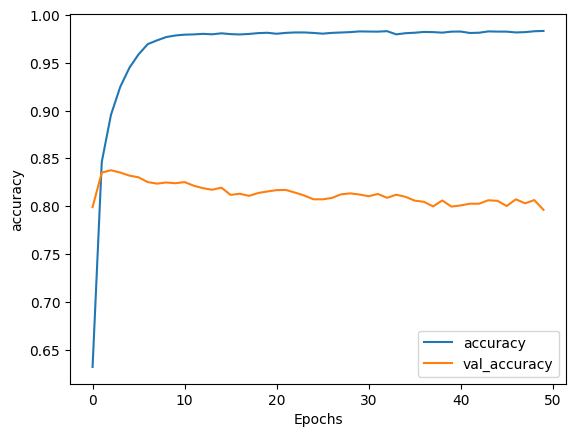

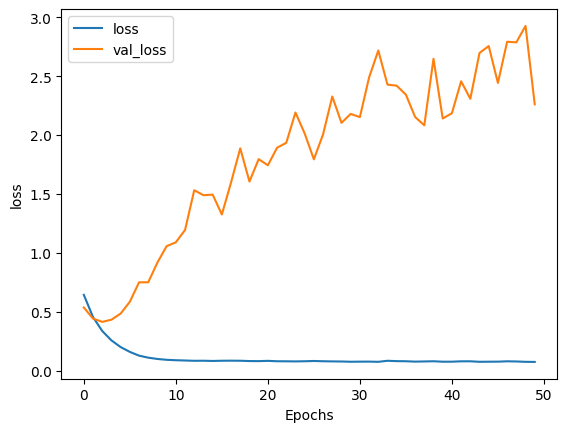

In [117]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

# Transfert Learning

In [118]:
!pip install --upgrade tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
import tensorflow_hub as hub

In [121]:
embed = hub.load("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1")
embeddings = embed(["cat is on the mat", "dog is in the fog"])

In [122]:
embeddings.shape

TensorShape([2, 20])

In [138]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [139]:
training_sentences = train_examples[:20000]
training_labels = train_labels[:20000]

test_sentences = train_examples[20000:]
test_labels = train_labels[20000:]

In [136]:
train_labels[20000:]

array([], dtype=int64)

In [133]:
train_examples[0]

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [124]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1", output_shape=[20],
                           input_shape=[], dtype=tf.string)

In [140]:
model = tf.keras.models.Sequential(
    [
        hub_layer,
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)
h = model.fit(training_sentences, training_labels, epochs=50,
              validation_data=(test_sentences, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 6s 5ms/step - loss: 0.7535 - accuracy: 0.5711 - val_loss: 0.6561 - val_accuracy: 0.6534
Epoch 2/50
625/625 [==============================] - 3s 5ms/step - loss: 0.6378 - accuracy: 0.6554 - val_loss: 0.6163 - val_accuracy: 0.6810
Epoch 3/50
625/625 [==============================] - 3s 5ms/step - loss: 0.6185 - accuracy: 0.6722 - val_loss: 0.6005 - val_accuracy: 0.6870
Epoch 4/50
625/625 [==============================] - 4s 7ms/step - loss: 0.6068 - accuracy: 0.6819 - val_loss: 0.5951 - val_accuracy: 0.6968
Epoch 5/50
625/625 [==============================] - 3s 5ms/step - loss: 0.6001 - accuracy: 0.6867 - val_loss: 0.5818 - val_accuracy: 0.7048
Epoch 6/50
625/625 [==============================] - 4s 7ms/step - loss: 0.5942 - accuracy: 0.6912 - val_loss: 0.5801 - val_accuracy: 0.7014
Epoch 7/50
625/625 [==============================] - 4s 7ms/step - loss: 0.5900 - accuracy: 0.6934 - val_loss: 0.5725 - val_accuracy: 0.7052
Epoch 

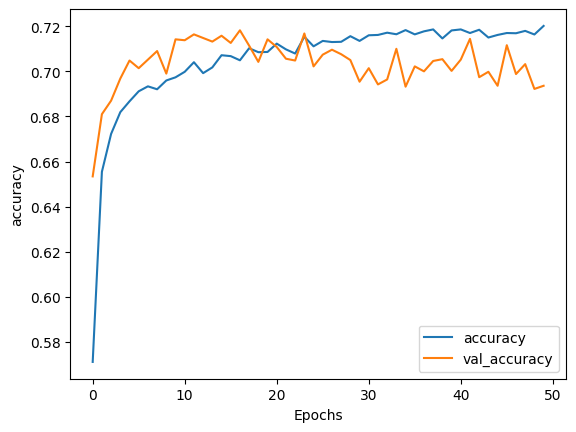

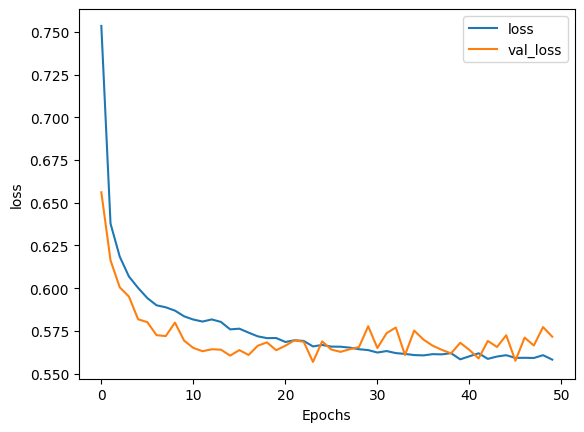

In [141]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")